In [1]:
# 출력데이터가 지저분하게 보이지 않도록 warnings을 불러왔다.
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
pd.__version__

'0.21.0'

In [3]:
# 크롤링해 온 국민청원 데이터를 판다스를 통해 읽어온다.
petitions = pd.read_csv('petition.csv', index_col=0, parse_dates=['start', 'end'])

In [4]:
# 데이터의 크기가 어느정도인지 본다.
petitions.shape

(3205, 6)

In [5]:
# head를 통해 상위 몇 개의 데이터만을 본다.
# 기본은 5개를 불러오며, 괄호안에 숫자를 적어주면 숫자만큼 불러온다.
petitions.head(3)

,start,end,votes,category,title,content
article_id,,,,,,
21,2017-08-19,2017-11-17,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
22,2017-08-19,2017-11-17,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
23,2017-08-19,2017-09-03,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [6]:
# 위에서 불러온 head와 반대로 뒤에서부터 데이터를 읽어온다.
# 터미널에서 크롤링을 하며 tail 파일명으로 크롤링 데이터를 읽었던 기억을 떠올려 보자.
petitions.tail(3)

,start,end,votes,category,title,content
article_id,,,,,,
3306,2017-09-04,2017-12-03,0,인권/성평등,소년법 폐지 처벌강화해주세요,대통령님 뉴스에 나온 부산 여중생 폭행사건\n말씀을 드리고 싶습니다 쉽게 넘어...
3307,2017-09-04,2017-12-03,0,인권/성평등,소년법 폐지 처벌강화해주세요,대통령님 뉴스에 나온 부산 여중생 폭행사건\n말씀을 드리고 싶습니다 쉽게 넘어...
3308,2017-09-04,2017-09-11,0,인권/성평등,소년법 폐지 꼭 필요합니다 제발,소년법 폐지해서 이번 부산 여중생 집단폭행 사건과 앞으로 청소년들이 이러한 사건을 ...


In [7]:
# 데이터프레임의 컬럼만을 불러올 수 있다.
petitions.columns

Index(['start', 'end', 'votes', 'category', 'title', 'content'], dtype='object')

In [8]:
# 데이터셋의 정보를 볼 수 있다.
# 어떤 컬럼이 있고 몇 개의 데이터가 있으며 어떤 타입인지 볼 수 있다.
petitions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3205 entries, 21 to 3308
Data columns (total 6 columns):
start       3205 non-null datetime64[ns]
end         3205 non-null datetime64[ns]
votes       3205 non-null int64
category    3205 non-null object
title       3205 non-null object
content     3205 non-null object
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 175.3+ KB


In [9]:
# 숫자로 된 데이터에 대해 count, mean, std, min, max값 등을 볼 수 있다.
petitions.describe()

,votes
count,3205.000000
mean,11.470515
std,54.103275
min,0.000000
25%,0.000000
50%,0.000000
75%,3.000000
max,950.000000


In [10]:
# N/A인 컬럼을 요약해 보여준다.
# 결측치가 있다면 보정이 필요하다. 하지만 이 데이터는 너무나 깔끔하다! 결측치가 없다.
# 하지만 때론, 결측치가 0이나 다른 숫자로 대체해서 들어가 있을 수도 있음으로 데이터를 좀 더 살펴봐야 한다.
petitions.isnull().sum()

start       0
end         0
votes       0
category    0
title       0
content     0
dtype: int64

In [11]:
# pandas의 value_counts로 특정 컬럼의 데이터를 그룹화하여 카운된 숫자를 볼 수 있다.
# 이 데이터로는 인권/성평등과 관련된 국민청원이 가장 많다는 것을 알 수 있다.
category = pd.DataFrame(petitions['category'].value_counts()).reset_index()
category.columns = ['category', 'counts']
category

,category,counts
0,인권/성평등,644
1,육아/교육,643
2,기타,327
3,안전/환경,313
4,외교/통일/국방,239
5,일자리,194
6,보건복지,194
7,교통/건축/국토,128
8,정치개혁,127
9,행정,123


### 시각화
- 시각화 툴로 EDA를 해보자.
- 여기에서는 시각화 도구로 [plotnine(A grammar of graphics for Python)](https://github.com/has2k1/plotnine)을 사용한다.

In [12]:
from plotnine import *

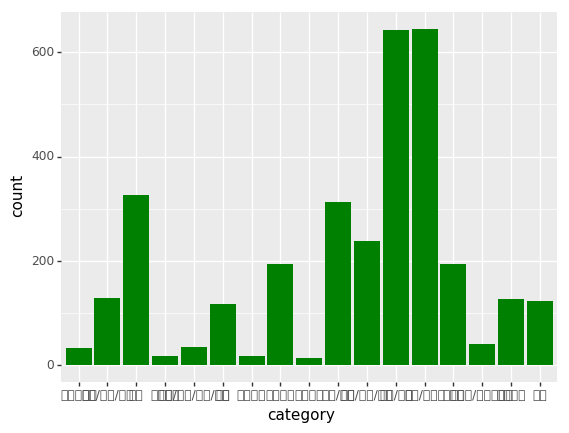

<ggplot: (-9223372036564006908)>

In [13]:
# 카테고리별로 집계된 데이터를 barplot으로 그려본다.
# 그런데 한글이 깨져보이는 것을 볼 수 있다.
(ggplot(petitions)
 + aes('category')
 + geom_bar(fill='green')
)


#### 한글폰트 사용하기
* 한글이 깨져보이는 것을 해결하기 위해 한글폰트를 사용해야 한다.
* 여기에서는 나눔바른고딕을 사용하도록 한다. 
    * 이때 폰트가 로컬 컴퓨터에 설치되어 있어야한다. 
    * 나눔고딕은 무료로 사용할 수 있는 폰트다. 
    * 참고 : [네이버 나눔글꼴 라이선스](https://help.naver.com/support/contents/contents.nhn?serviceNo=1074&categoryNo=3497)
* 한글을 사용하기 위해서는 ggplot에서 theme에 폰트를 지정해 주면된다.
* 아래의 문서를 참고하면 **element_text**와 관련된 옵션을 볼 수 있다.
* 참고 : [plotnine.themes.element_text — plotnine 0.3.0 documentation](http://plotnine.readthedocs.io/en/stable/generated/plotnine.themes.element_text.html)

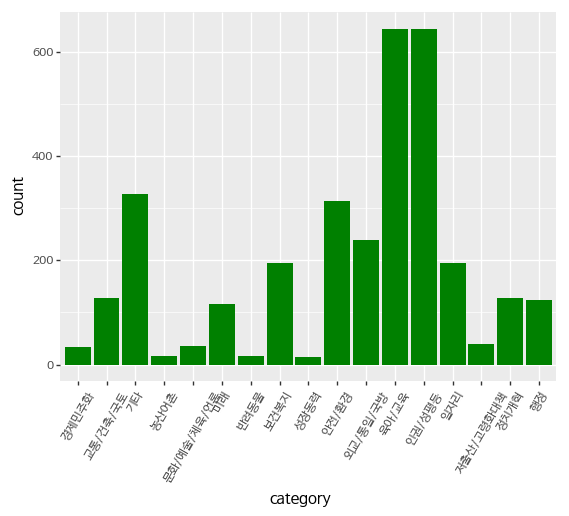

<ggplot: (-9223372036563875566)>

In [14]:
# 글씨가 겹쳐보이지 않도록 rotation도 추가했다.
(ggplot(petitions)
 + aes('category')
 + geom_bar(fill='green')
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=60))
)

### 카테고리별 투표수

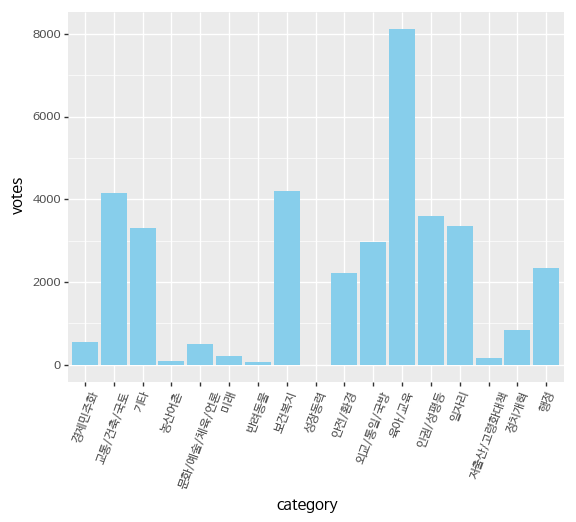

<ggplot: (290961128)>

In [15]:
# 다음으로 투표를 많이 받은 카테고리를 알아본다.
# 인권/성평등에 관련된 청원의 숫자가 가장 많았지만 투표를 가장 많이 받은 청원은 육아/교육이다.
(ggplot(petitions)
 + aes(x='category', y='votes')
 + geom_col(fill='skyblue')
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=70))
)

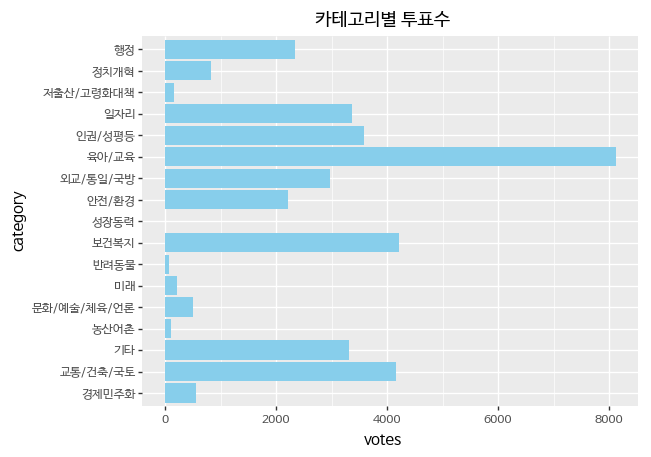

<ggplot: (290978701)>

In [16]:
# coord_flip을 사용해서 x축과 y축을 바꿔본다.
(ggplot(petitions)
 + aes(x='category', y='votes')
 + geom_col(fill='skyblue')
 + ggtitle('카테고리별 투표수')
 + coord_flip()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [17]:
# 투표를 가장 많이 받은 카테고리인 육아/교육에서 투표수가 많은 순으로 상위 10개만 본다.
edu = petitions.loc[(petitions['category']=='육아/교육')]
edu.sort_values('votes', ascending=False)[:10]

,start,end,votes,category,title,content
article_id,,,,,,
673,2017-08-27,2017-09-03,616,육아/교육,"초등학교 엉터리 석면공사에도 대책없는 교육청, 바로잡아 주세요!!!",경기도 교육청에서 이번 여름방학중 진행한 과천 관문초등학교 천장 석면텍스교체공사에서...
74,2017-08-20,2017-11-18,520,육아/교육,기간제 교사 정규직화 결사 반대,안녕하세요 대통령님. 저는 중등임용 국어과목을 준비하고 있는 예비교사입니다.\n올해...
70,2017-08-20,2017-09-19,382,육아/교육,학교내 각종 강사 무기직 전환을 반대합니다.,학교내 강사들의 무기계약직화 반대합니다. 학교내 강사들은 일자리 창출을 위한 수단일...
86,2017-08-20,2017-09-04,374,육아/교육,사법고시 존치,http://m.bbs3.agora.media.daum.net/gaia/do/mob...
65,2017-08-20,2017-11-18,285,육아/교육,기간제교사 정규직 및 무기계약직전환 반대합니다,"저는 영어전문강사, 스포츠전문강사를 무기계약직 혹은 정규직으로 전환하는 것에 반대합..."
66,2017-08-20,2017-09-19,263,육아/교육,기간제 교사 및 각종 강사들의 무기계약 및 정규직 전환 반대합니다!,"정부에서 제시한 일자리 로드맵에서 사회적 합의를 위해 청년들에게 인기가 많고, 공채..."
1434,2017-09-02,2017-10-02,262,육아/교육,별거 부부 문제 해결,안녕하세요. 현재 광역시에서 근무하고 있는 중등 교사이자 1살 갓난아기를 키우고 있...
1051,2017-08-31,2017-09-30,260,육아/교육,보육교사 반별 인건비 지원 부탁드립니다,"제목 : 보육교사에게 반별 교사인건비지원 부탁드립니다.\n동일자격, 동일노동, 동일..."
1101,2017-08-31,2017-09-30,259,육아/교육,영양교사에 관한 진실을 밝혀주십시오.,존경하는 대통령님\n대통령님의 높은 지지율에 한몫하고 있는 평범한 20대 임용고사 ...


### 시계열 데이터 보기

In [18]:
petitions['start_month'] = petitions['start'].dt.month
petitions['start_day'] = petitions['start'].dt.day
petitions['start_hour'] = petitions['start'].dt.hour
petitions.shape

(3205, 9)

In [19]:
petitions['start_month'].value_counts()

9    2082
8    1123
Name: start_month, dtype: int64

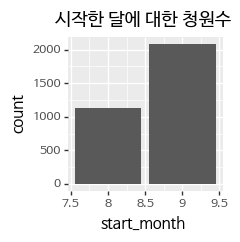

<ggplot: (-9223372036563322557)>

In [20]:
(ggplot(petitions)
 + aes('start_month')
 + geom_bar()
 + ggtitle('시작한 달에 대한 청원수')
 + theme(text=element_text(family='NanumBarunGothic'),  figure_size=(2, 2))
)

In [21]:
# 5일부터 18일까지의 데이터는 없다.
petitions['start_day'].value_counts()

4     1424
2      245
3      224
1      189
31     166
30     128
29     114
21      89
24      89
28      86
20      79
25      77
23      76
26      69
22      68
27      48
19      34
Name: start_day, dtype: int64

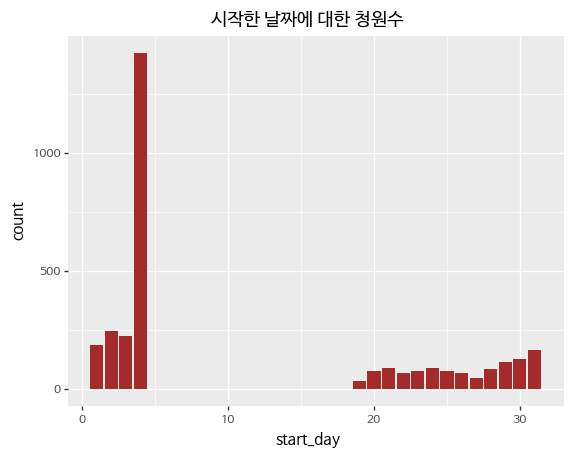

<ggplot: (291731548)>

In [22]:
# 5일~18일은 데이터가 없다.
(ggplot(petitions)
 + aes('start_day')
 + geom_bar(fill='brown')
 + ggtitle('시작한 날짜에 대한 청원수')
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [23]:
# 청원시작 날짜이기 때문에 시간은 의미가 없다.
petitions['start_hour'].value_counts()

0    3205
Name: start_hour, dtype: int64

In [24]:
# 청원시작 날짜를 보니 8월 19일부터 9월 4일까지의 데이터가 있다.
# 9월 4일 데이터가 가장 많이 집계되었다.
start = pd.DataFrame(petitions['start'].value_counts()).reset_index().sort_values('start', ascending=True)
start.columns = ['start', 'counts']
start

,start,counts
16,2017-08-19,34
15,2017-08-27,48
14,2017-08-22,68
13,2017-08-26,69
12,2017-08-23,76
11,2017-08-25,77
10,2017-08-20,79
9,2017-08-28,86
8,2017-08-24,89
7,2017-08-21,89


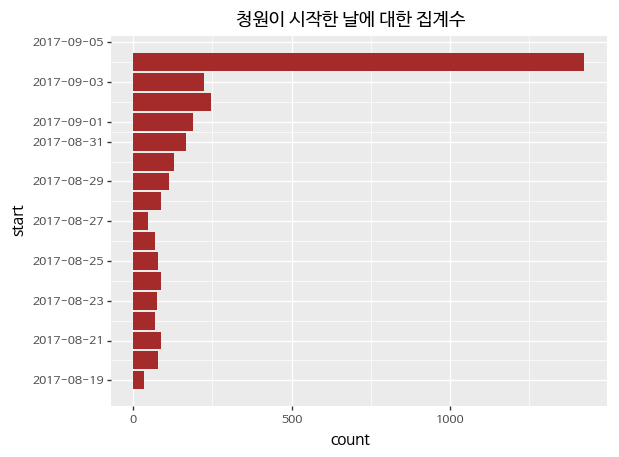

<ggplot: (-9223372036563372365)>

In [25]:
(ggplot(petitions)
 + aes('start')
 + geom_bar(fill='brown')
 + ggtitle('청원이 시작한 날에 대한 집계수')
 + coord_flip()
 + theme(text=element_text(family='NanumBarunGothic'))
)

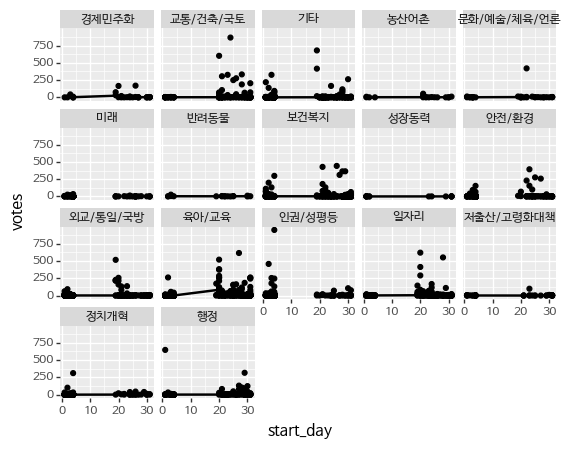

<ggplot: (292204408)>

In [26]:
# 날짜별로 카테고리별 투표수를 본다.
(ggplot(petitions)
 + aes('start_day', 'votes')
 + geom_point()
 + stat_smooth()
 + facet_wrap('category')
 + theme(text=element_text(family='NanumBarunGothic'))
)